# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [2]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

(1800, 2400)


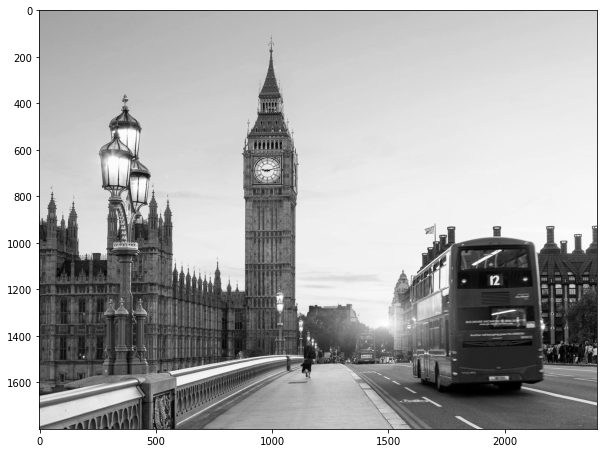

In [5]:
# Read the image (provided)
image = np.array(imageio.imread('london.jpg'))
print(image.shape)
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

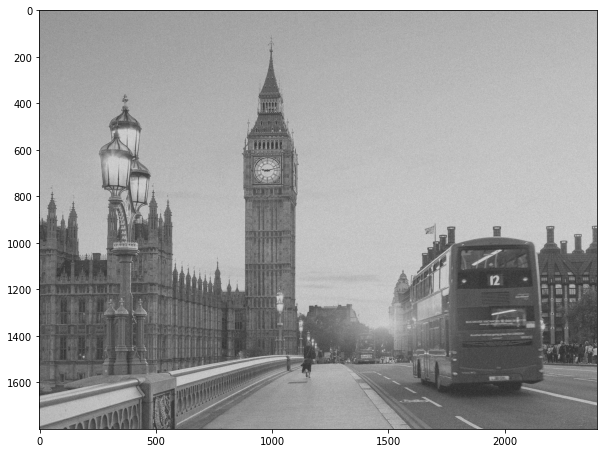

In [95]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


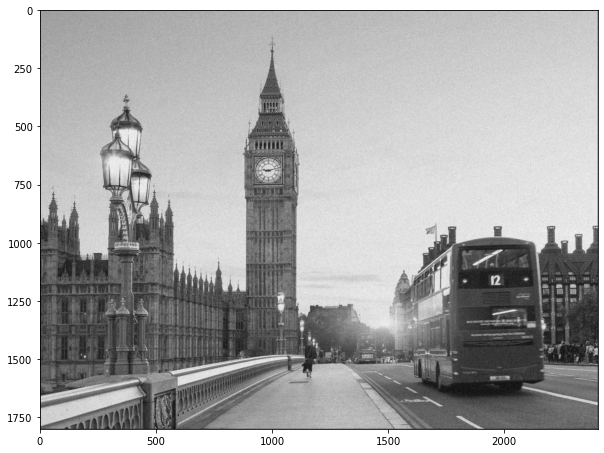

In [96]:
# Design the filter h
import numpy as np

h = np.ones((3,3))
h=h/9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy,h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

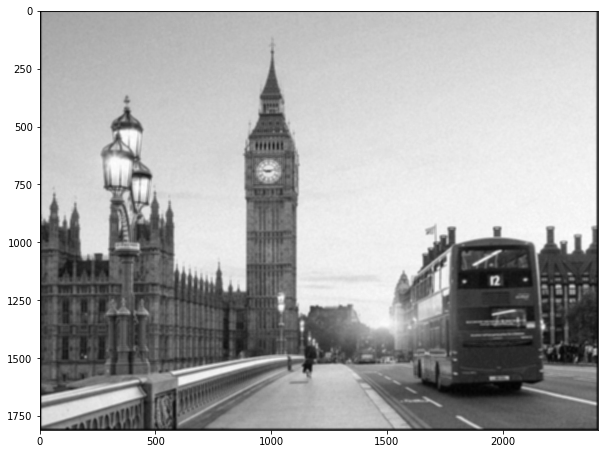

In [97]:
# Design the filter h
h = np.ones((11,11))

h=h/121

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy,h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

1. When using the 3*3 filter, it makes the noisy image a little bit clear. From my point of view, that is because that the guassian noise add some noise which is Gussaian Distrubuted to the picture. The moving average filter averages the instensity of pixels. Therefore, it can average those noisy pixels with some normal pixelsd to some extent, which makes the picture a little bit clear. 
2. But the picture generated by 11*11 moving average filter is more blur and smooth than the picture generated by the 3*3 filter. So generally, the bigger the kernel size (filter) size is, the picture generated by that kernel would be more blur and smooth. In my opion this is because using a larger filter means you need to average more intensity of the pixels, which may reduce the high-frequency pixels and keep the low_frequency pixels

## 2. Edge detection (65 points).

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters for edge detection.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (10 points)

h_sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h_sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


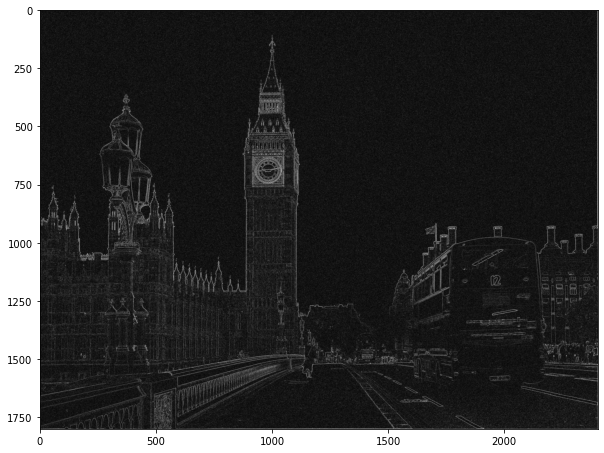

In [98]:
# Design the Sobel filters
h_sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=int)
h_sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=int)

# Sobel filtering

g_x=scipy.signal.convolve2d(image_noisy,h_sobel_x)
g_y=scipy.signal.convolve2d(image_noisy,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag=np.sqrt(np.power(g_x,2)+np.power(g_y,2))

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

[[2.18236448e-06 5.61169806e-06 1.29123819e-05 2.65866421e-05
  4.89852888e-05 8.07630877e-05 1.19153063e-04 1.57305015e-04
  1.85833918e-04 1.96450190e-04 1.85833918e-04 1.57305015e-04
  1.19153063e-04 8.07630877e-05 4.89852888e-05 2.65866421e-05
  1.29123819e-05 5.61169806e-06 2.18236448e-06]
 [5.61169806e-06 1.44298331e-05 3.32026980e-05 6.83644778e-05
  1.25960009e-04 2.07672947e-04 3.06388333e-04 4.04491667e-04
  4.77850443e-04 5.05148961e-04 4.77850443e-04 4.04491667e-04
  3.06388333e-04 2.07672947e-04 1.25960009e-04 6.83644778e-05
  3.32026980e-05 1.44298331e-05 5.61169806e-06]
 [1.29123819e-05 3.32026980e-05 7.63986075e-05 1.57305015e-04
  2.89830945e-04 4.77850443e-04 7.04992167e-04 9.30725575e-04
  1.09952235e-03 1.16233558e-03 1.09952235e-03 9.30725575e-04
  7.04992167e-04 4.77850443e-04 2.89830945e-04 1.57305015e-04
  7.63986075e-05 3.32026980e-05 1.29123819e-05]
 [2.65866421e-05 6.83644778e-05 1.57305015e-04 3.23891607e-04
  5.96762985e-04 9.83895828e-04 1.45158148e-03 1.9

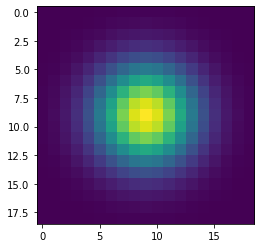

In [99]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    k=3
    radius=k*sigma
    size= 2*radius+1
    h= np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            h[i][j]=1/(2*np.pi*np.power(sigma,2))*(np.exp(-((np.power(i-radius,2)+np.power(j-radius,2))/(2*np.power(sigma,2)))))
    
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
print(h)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering, show the gradient magnitude image. (7 points)

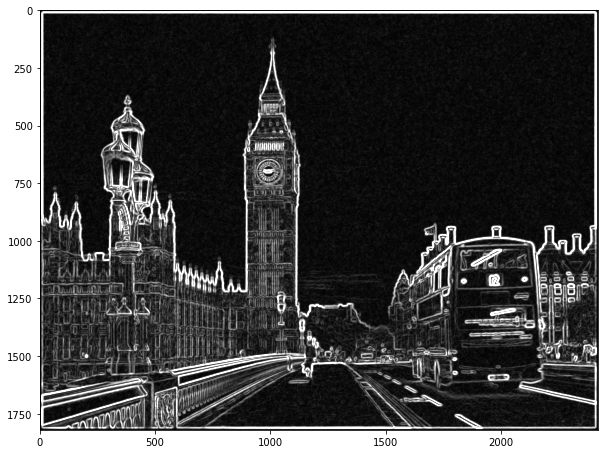

In [100]:
# Perform Gaussian smoothing before Sobel filtering
sigma=3
gaussian_smoothing=gaussian_filter_2d(sigma)
image_smoothing=scipy.signal.convolve2d(image_noisy,gaussian_smoothing)

# Sobel filtering
g_x=scipy.signal.convolve2d(image_smoothing,h_sobel_x)
g_y=scipy.signal.convolve2d(image_smoothing,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag=np.sqrt(np.power(g_x,2)+np.power(g_y,2))

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering. (9 points)

The computational time that 2D Gaussian need is  21.379265069961548


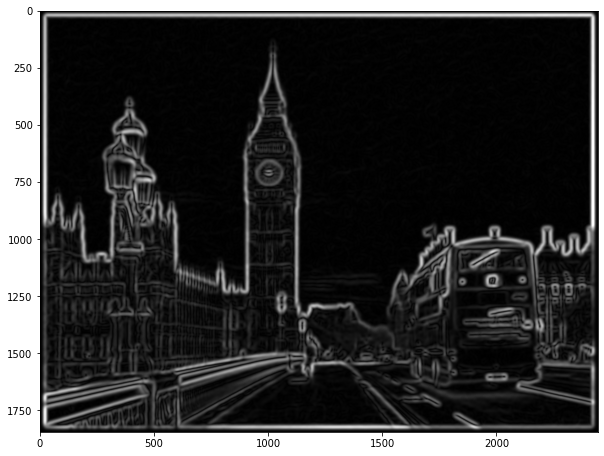

In [101]:
# Construct the Gaussian filter
sigma=7
gaussian_smoothing=gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start = time.time()
image_smoothing=scipy.signal.convolve2d(image_noisy,gaussian_smoothing)
duration = time.time()-start
print("The computational time that 2D Gaussian need is ",duration)

# Sobel filtering
g_x=scipy.signal.convolve2d(image_smoothing,h_sobel_x)
g_y=scipy.signal.convolve2d(image_smoothing,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag=np.sqrt(np.power(g_x,2)+np.power(g_y,2))

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

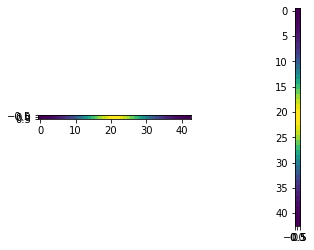

In [102]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    #k=3
    k=3
    radius=k*sigma
    
    #the size of the Guassian kernel
    size=2*radius+1
    h=np.ones(size)
    for i in range(size):        
        h[i]=1/(np.sqrt(2*np.pi)*sigma)*(np.exp(-(np.power(i-radius,2))/(2*np.power(sigma,2))))                
    return h


# sigma = 7 pixel (provided)
sigma = 7
k=3
radius=k*sigma
size=2*radius+1

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma).reshape(1,size)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma).reshape(size,1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering and show results. (9 points)

The computational time that 2D Gaussian need is  1.7718000411987305


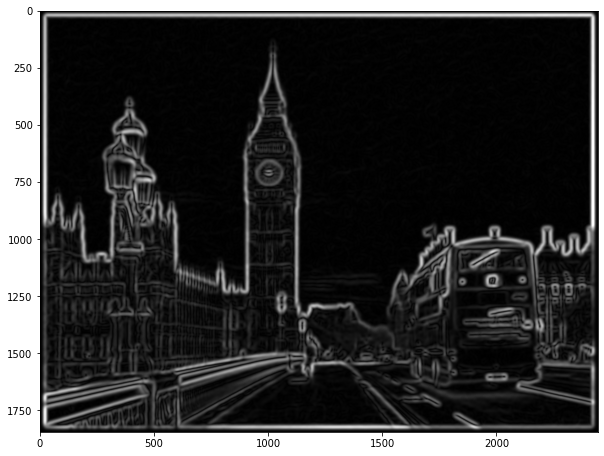

In [103]:
# Perform separable Gaussian smoothing and count time
sigma = 7
k=3
radius=k*sigma
size=2*radius+1
h_x = gaussian_filter_1d(sigma).reshape(1,size)
h_y = gaussian_filter_1d(sigma).reshape(size,1)

#compute the time and  perform the convolution
start = time.time()
image_smoothing=scipy.signal.convolve2d(image_noisy,h_x)
image_smoothing=scipy.signal.convolve2d(image_smoothing,h_y)
duration = time.time()-start
print("The computational time that 2D Gaussian need is ",duration)

# Sobel filtering
g_x=scipy.signal.convolve2d(image_smoothing,h_sobel_x)
g_y=scipy.signal.convolve2d(image_smoothing,h_sobel_y)

# Calculate the gradient magnitude
sobel_mag=np.sqrt(np.power(g_x,2)+np.power(g_y,2))

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (10 points)

1. In terms of the solution in 2.1, when using a sobel filter directly on a noisy image, the egde is darker and thinner than that of using Guassian(sigma=3) + Sobel filter(in section 2.3). Therefore, the edge detection is really sensitive to the noise, which would have a really bad effect on edge detection. If we remove the noise with some filters (in this case the Gaussian filter), the edge would be  more clear and easier to detect. However, if you use a larger Gaussian filter (sigma=7 instead of sigma=3) the edge would be blur. In my oppinon, this is because the Guassian filter not only removes the noise but also makes the picture more blur (because it is a low-pass filter). Hence, detecting edge of a blur picture, the edge would be also blur.

2. As we can see in the result, using 2D Gaussian filter, it took 21.379265069961548 to complete while using separable filters it only take 1.7718000411987305. Hence, using separable filters takes less time. This is because the time complexity are different.The separable filter has a smaller time complexity
 
 For:mage size =N*N

  2D Gaussian filter:
  Gaussian kernel size: (sigma*3*2+1)*(sigma*3*2+1)(in this case k=3)
  complexity: O(N^2*sigma^2)

  separable filter:
  size:  1*(sigma*3*2+1) and (sigma*3*2+1)*1
  complexity:O(N^2*sigma)
   

## 3. Challenge: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [104]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [105]:
# Expand the dimension of the numpy array
x= image_noisy.shape[0]
y=image_noisy.shape[1]
expand_array=np.zeros((1,1,x,y))
expand_array[0,0]=image_noisy

# Convert to a Pytorch tensor using torch.from_numpy
image=torch.from_numpy(expand_array)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [106]:
# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
print(conv)

# Set the kernel weight
#creating the moving average filter
h=np.ones((3,3))
h=h/9
h=h.reshape(1,1,3,3)
filter_torch=torch.from_numpy(h)
conv.weight=torch.nn.Parameter(filter_torch)
print(conv.weight)

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Parameter containing:
tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]], dtype=torch.float64, requires_grad=True)


### 3.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

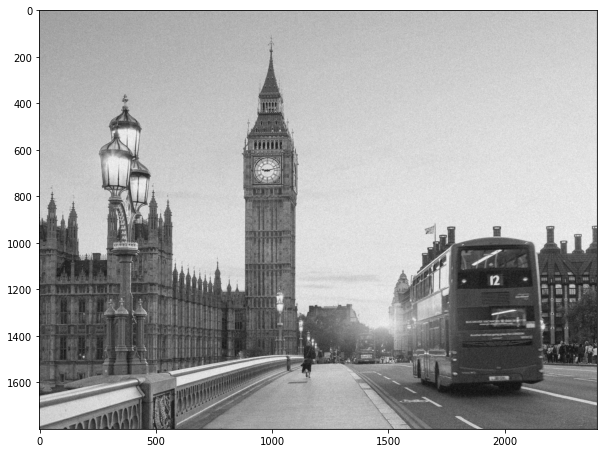

In [107]:
# Filtering
x= image_noisy.shape[0]
y=image_noisy.shape[1]
image_filtered=conv(image)
image_filtered= image_filtered.detach().numpy()
image_filtered=image_filtered.reshape(x,y)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

In [108]:
#3-4 hours
